In [2]:
# ONE MAGNET STRONG IN THE AIR
# 1. import the b0 map

import numpy as np  
import b0
b0map_v21_init = b0.b0()
filename_to_import_csv_data_from = r'./data/240820/240822_grid_10mm_R120_overnight_bvals_shifted_magnet_coordinates.csv'
#filename_to_import_csv_data_from = r'./data/240619/Thursday_ball_R120_12pts_bvals_shifted.csv'

b0map_v21_init.import_from_csv(filename_to_import_csv_data_from)
b0map_v21_init.transfer_coordinates_of_the_path_from_cosi_to_magnet()


# change coordinates to magnet

No path object given on construction of b0 object.
 b0 instance initialized without path.
importing b0 object from csv file./data/240820/240822_grid_10mm_R120_overnight_bvals_shifted_magnet_coordinates.csv
No path object given on construction of b0 object.
 b0 instance initialized without path.
warning. path file  /home/cosi/cosi-measure/Software/COSI2/data/240820/240822_grid_10mm_R120_overnight,,,,,,
 not used. path data taken from csv!
OOPS
OOPS
OOPS
OOPS
importing path from a csv file
ROTATING THE PATH NOW!
path center set to:  [ 0.01540401  0.03640947 -0.1246324 ]
ROTATING THE MAGNET NOW!
warning! euler angles of the magnet changed!
len(path.r)= 7141
len(b0Data)= 7141
-119.94818652849744  < x <  120.05181347150253
-119.97899453858001  < y <  120.02100546141997
-120.0  < z <  110.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 1

In [3]:

# spherical decomposition
diameter_of_sphere = b0map_v21_init.path.radius*2
order = 17
resolution_of_sph_decomp = 10
print(diameter_of_sphere)

#b0map_before.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)
#b0map_after.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)
b0map_v21_init.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)

resolution_of_sph_fit=8
print('interpolating field with sph order %d, resol %.0f mm'%(order,resolution_of_sph_fit))

#b0map_before.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)
#b0map_after.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)
b0map_v21_init.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)


240.2110378729535
(25, 25, 23)
Mean field strength in 24 cm sphere: 48.17 mT
Inhomogeneity in 24 cm sphere: 41959 ppm
Inhomogeneity of fit: 42296 ppm
Error: 610082143 ppm
saved numpy array as ./data/tmp/SpHData.npy
interpolating field with sph order 17, resol 8 mm
sph coefficients loaded
making a fine coordinate grid
Inhomogeneity of fit: 45372 ppm
saved numpy array as ./data/tmp/B0_interpolated.npy


48.171212150707156
47.000072933915476 49.18571225783751


<Figure size 640x480 with 0 Axes>

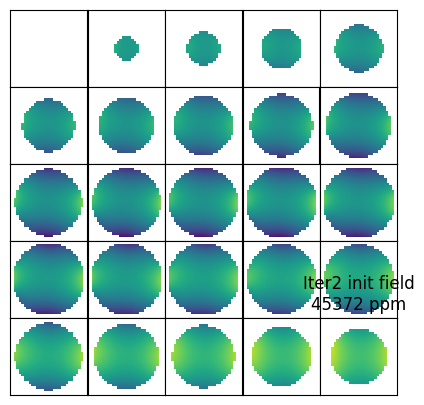

In [4]:
# initial field (interpolated)
# save initial field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)


xvals = b0map_v21_init.xDim_SPH_fine
FieldMeasured = b0map_v21_init.interpolatedField
mapsize = int(np.sqrt(len(FieldMeasured[:,0,0])))

fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))


print(np.nanmean(FieldMeasured))

print(np.nanmin(FieldMeasured),np.nanmax(FieldMeasured))

for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(FieldMeasured[i+j*mapsize,:,:],clim=[np.nanmin(FieldMeasured),np.nanmax(FieldMeasured)])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
initHomo = abs((np.nanmax(FieldMeasured)-np.nanmin(FieldMeasured))/np.nanmean(FieldMeasured))*1e6
plt.title('Iter2 init field\n%.0f ppm'%initHomo)

plt.savefig('./pics/iter2_init_field.png',format="png")
plt.savefig('./pics/iter2_init_field.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()

In [33]:
# artificial data
center = [0,0,0]
radius = 120
singularity_coords = [0,0,0]
radpts = 12
pthfnm = r'C:/cosi-measure/Software/COSI2/data/240820/TST_COSI_CENTER.path'

from pathgen import ball_path
sphere_path = ball_path.ball_path(filename_input=pthfnm,center_point_input=center,radius_input=radius,radius_npoints_input=radpts,check_extremes=False)

for r in sphere_path.


SyntaxError: invalid syntax (3687152327.py, line 11)

In [ ]:
# write artificial data to csv file
filename = r'C:/cosi-measure/Software/COSI2/data/240820/TST_COSI_CENTER.csv'
with open(filename, 'w') as file:				
    from datetime import datetime
    file.write('# COSI2 B0 scan\n')                    
    # Convert date and time to string
    dateTimeStr = str(datetime.now())
    file.write('# time '+dateTimeStr+'\n')
    file.write('# MAGNET CENTER IN LAB: x %.3f mm, y %.3f mm, z %.3f mm\n'%(center[0],center[1],center[2]))
    file.write('# MAGNET AXES WRT LAB: alpha %.2f deg, beta %.2f deg, gamma %.2f deg\n'%(alpha,beta,gamma))   
    file.write('# path: '+'x'+'\n')
    file.write('# X[mm],Y[mm],Z[mm],B0_x[mT],B0_y[mT],B0_z[mT],B0_abs[mT]\n')  
    for i,x_ in enumerate(x):
        for j,y_ in enumerate(y):
            for k,z_ in enumerate(z):
                file.write('%.2f,%.2f,%.2f,%.4f,%.4f,%.4f,%.4f\n'%(x_,y_,z_,b0Data[i,j,k,0],b0Data[i,j,k,1],b0Data[i,j,k,2],b0Data[i,j,k,3]))
    file.close()





In [ ]:

#!!! from here - shimming
#??? lets generate fields of all inserts, all rings.
#??? Insert X ring 0, minimal Z, Y~0, all rotations pointing to -Z direction (alpha=-pi/2) 0 reference

In [5]:
# shim magnets positinoing

mu                  = 1e-7

magSizeOuter        = 6*1e-3        #size of shim magnets
NEW_B_REM = 1.35*1.35*1.2
bRem                = NEW_B_REM #1.35 # [T]      #remanence field of shim magnets

#shim tray configuration
def ringposFromTrayNr(trays_ocp):
    trayslitspacing = 9e-3 # [m]
    coordinates = []
    for tray_pos in trays_ocp:
        coordinate = trayslitspacing*tray_pos-4.5e-3 if tray_pos>0 else trayslitspacing*tray_pos+4.5e-3
        coordinates.append(coordinate)
    return coordinates


shimRadius          = 260*1e-3#276*1e-3#!!!TMP 276*1e-3#276*1e-3 <- was set by Tom!      # radius on which the shim magnets are placed

trays_occupied = [1]#[-7,-5,1,14] #[-18,-5,1,12] <- 27mm best  [-7,-5,1,14] 997
ringPositions       = ringposFromTrayNr(trays_occupied)#[-121.5*1e-3, -40.5*1e-3, 31.5*1e-3, 121.5*1e-3]#np.linspace(-ringspacingouter,ringspacingouter,4)#np.linspace(-0.1755,0.1755,4)          #np.linspace(-0.2295, .2295, 4) #Z positions to place shin rubgs
print(np.array(ringPositions)*1e3)


[4.5]


In [ ]:

magsPerSegment      = 7             # number of magnets peer shim tray segment
anglePerSegment     = 19.25 #the angular distance in degrees between the furthest magnets in a shim tray (span of magnets in shim tray)
numSegments         = 12 #corresponds to the number of shim trays


segmentAngles       = np.linspace(0,360, numSegments, endpoint = False)

magAngles           = np.linspace(-anglePerSegment/2, anglePerSegment/2, magsPerSegment) 

print('let us position some magnets on a circumference of a R=%.0f mm YZ circle with X=0'%(shimRadius*1000))

positions = []
insert_nr = 9 # IRL 3!!!
for ringPosition in ringPositions:
    for segmentAngle in segmentAngles:
        for magAngle in magAngles:
            position = [ringPosition,shimRadius*np.cos((segmentAngle+magAngle)*np.pi/180), shimRadius*np.sin((segmentAngle+magAngle)*np.pi/180)]
            # ONLY INSERT 3, y~0, min(|z|)
            #if (segmentAngle > 360/12*(insert_nr-0.5)) and (segmentAngle < 360/12*(insert_nr+0.5)):
                # choose only Ring 0:
                #if ringPosition == ringPositions[0]:
                    #position[0] = -0.07 #!!!!! TEMP!!!!!
                    #position[2] -=0.03 #!!!!! TEMP!!!!!
                    #print(360/12*(insert_nr-0.5),360/12*(insert_nr+0.5))
            positions.append(position)
                
print(len(positions))

for pos in positions:
    print(pos[0],pos[1],pos[2])


In [ ]:

import matplotlib.pyplot as plt
axs = plt.axes()
for idx,position in enumerate(positions):

    axs.scatter(position[1],position[2],color = [idx/len(positions),0,0])

axs.set_aspect(1)
plt.xlabel('Y')
plt.ylabel('Z')


initialField = b0map_v21_init.interpolatedField
numMags = len(positions)
coordinate_grid = b0map_v21_init.coord_grid_fine



magnetFields = np.zeros((np.shape(initialField)+(3,numMags)), dtype = np.float32)
magnetFields_fair = np.zeros((np.shape(initialField)+(3,numMags)), dtype = np.float32)


def magnetization(bRem, dimensions, shape = 'cube', evalDistance = 1):
    #Use the analytical expression for the z component of a cube magnet to estimate
    #dipole momentstrength for correct scaling. Dipole approximation only valid 
    #far-ish away from magnet, comparison made at 1 meter distance.
    if shape == 'cube':
        b_analytic = (bRem/np.pi) *(np.arctan2(dimensions**2, 2*evalDistance *np.sqrt(4*(evalDistance**2) + 2*(dimensions**2)))-\
                        np.arctan2(dimensions**2, 2*(dimensions + evalDistance)*\
                                   np.sqrt(4*((dimensions+evalDistance)**2)+2*(dimensions**2))))
    
        dip_mom = b_analytic * (dimensions/2 + evalDistance)**3 /(2*mu) #strength of the dipole moment
    
    return dip_mom

from utils import shimming_magnet

shimming_magnets = []

DSV = 2*max(b0map_v21_init.xDim_SPH_fine)#b0map.path.radius*2

dip_mom = magnetization(bRem=bRem,dimensions=magSizeOuter)
dip_vec = mu*np.array([0,dip_mom,0]) #initially along y


for idx1, position in enumerate(positions):
    magnet = shimming_magnet.shimming_magnet(position=position,rotation_yz=0)
    magnet.bRem = NEW_B_REM # T
    magnet.render_field(grid=coordinate_grid)
    #magnetFields[:,:,:,:,idx1] = magnet.singleMagnet(position, grid=coordinate_grid)
    magnetFields[:,:,:,:,idx1] = magnet.OLD_singleMagnet(position=position,dipoleMoment = dip_vec, 
                                                         simDimensions=[DSV*1e-3,DSV*1e-3,DSV*1e-3],
                                                         resolution=1/resolution_of_sph_fit*1e3,
                                                         plotFields=False)[:,:,:,:] #singleMagnet(position, grid=coordinate_grid)

    #magnetFields_fair[:,:,:,:,idx1] = magnet.singleMagnet(position=position,grid=coordinate_grid,plotFields=False)

    shimming_magnets.append(magnet)

magnetFields *= 1e3

print(DSV)


In [ ]:
# cheap vs real fields
# DO NOT RUN
plt.cla()

v=max(b0map_v21_init.xDim_SPH_fine)
magnet_index = 0
for i in range(2):
    alpha = i*2*np.pi/4
    cheapfield = magnetFields[12,:,:,2,magnet_index]*np.cos(alpha)+magnetFields[12,:,:,1,magnet_index]*np.sin(alpha)
    plt.imshow(cheapfield,vmin=-1e-3, vmax=1e-3,extent=[-v,v,v,-v])
    plt.title('cheap %.0f deg'%(alpha*180/np.pi))
    plt.xlabel('Z')
    plt.ylabel('Y')
    
    plt.show()
    magnet = shimming_magnets[magnet_index]
    magnet.rotation_yz = alpha
    magnet.render_field(grid=coordinate_grid)

    plt.imshow(1e3*(magnet.B0[12,:,:,2]),vmin=-1e-3, vmax=1e-3,extent=[-v,v,v,-v])
    plt.title('real %.0f deg'%(alpha*180/np.pi))
    plt.xlabel('Z')
    plt.ylabel('Y')
    plt.show()
    
    # DIFF
    plt.imshow(1e3*(magnet.B0[12,:,:,2])-cheapfield,vmin=-1e-11, vmax=1e-11,extent=[-v,v,v,-v])
    plt.title('real-cheap %.0f deg'%(alpha*180/np.pi))
    plt.xlabel('Z')
    plt.ylabel('Y')
    plt.colorbar()
    plt.show()

In [ ]:
# visualize the field of one insert
resolution = 1/resolution_of_sph_fit*1e3

X = b0map_v21_init.xDim_SPH_fine*1e0
Y = b0map_v21_init.yDim_SPH_fine*1e0
Z = b0map_v21_init.zDim_SPH_fine*1e0

ONEINSERTFIELD = magnetFields[:,:,:,:,0]*0

ax = plt.figure().add_subplot()

for idx in range(len(positions)):

    position = positions[idx]
    y2d, z2d = np.meshgrid(Y,Z,indexing='ij') #!!!!!!!!!!!

    shimming_magnets[idx].rotation_yz = np.pi/2

    shimming_magnets[idx].render_field(grid=coordinate_grid)
    print(shimming_magnets[idx])
    ONEINSERTFIELD += shimming_magnets[idx].B0  #magnetFields[:,:,:,:,idx]#+magnetFields[:,:,:,:,idx+14]

    
    ax.plot(position[1]*1000,position[2]*1000,'x')
    
scale = 5e-0
yzsliceindex = 2
mpbl = ax.contourf(y2d,z2d,(ONEINSERTFIELD[yzsliceindex,:,:,2]),cmap='viridis',levels=64)#,vmin = -scale, vmax= scale)

plt.colorbar(mappable=mpbl)
#ax.plot(min(Y),min(Z),'ko')
#ax.plot(max(Y),max(Z),'ko')

ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_xlim(-290,290)
ax.set_ylim(-290,290)
ax.set_aspect(1)
                
ax.set_title('z component of shim field YZ plane, X= %.2f'%(X[yzsliceindex]))

plt.savefig('./pics/field_of_ALL_INSERTS_ITER2_INITIAL.png',format="png")
plt.savefig('./pics/field_of_ALL_INSERTS_ITER2_INITIAL.pdf',format="pdf")

plt.show()

In [ ]:
# RENDERING FIELDS OF SHIM MAGNETS

MagnetsField_simulated = shimming_magnets[0].B0[:,:,:,2]*0
    

for idx, magnet in enumerate(shimming_magnets):
    print(magnet.position)
    alpha =np.pi/2#!TEMP-np.pi/2
    magnet.bRem = NEW_B_REM # T #!!! IMPORTANT !!!
    magnet.rotation_yz = alpha
    magnet.render_field(grid=coordinate_grid)
    MagnetsField_simulated += magnet.B0[:,:,:,2]#magnet.B0[:,:,:,1]*np.sin(alpha)+magnet.B0[:,:,:,2]*np.cos(alpha)
    
#mask the one magnet field:
MagnetsField_simulated*= b0map_v21_init.sphere_mask
MagnetsField_simulated*=1e3 

homo_oneMagnet = (np.nanmax(MagnetsField_simulated)-np.nanmin(MagnetsField_simulated))/np.nanmean(MagnetsField_simulated)*1e6
print('homo of one magnet ppm %.0f'%(abs(homo_oneMagnet)))
print('mean mT %.2f'%(abs(np.nanmin(MagnetsField_simulated))))


In [ ]:
# what we expect with insert at min_z 0y ring 0:
plt.figure(0)

mapsize = int(np.sqrt(len(FieldMeasured[:,0,0])))
fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_v21_init.xDim_SPH_fine

d = np.shape(coordinate_grid[0])
print(d[0])


for i in range(mapsize):
    for j in range(mapsize):
        #xxx = axes[j,i].imshow(oneMagnetField_simulated[:,:,i+j*5],clim=[-0.00000087,-0.00000073])
        xxx = axes[j,i].imshow(MagnetsField_simulated[i+j*mapsize,:,:],clim=[np.nanmin(MagnetsField_simulated),np.nanmax(MagnetsField_simulated)])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('all inserts -Z, expected')

plt.savefig('./pics/ALL_INSERTS_AGAINST_Z_SIM.png',format="png")
plt.savefig('./pics/ALL_INSERTS_AGAINST_Z_SIM.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()


In [ ]:
# measured - expected:
# what we expect with insert at min_z 0y ring 0:
plt.figure(0)

mapsize = int(np.sqrt(len(FieldMeasured[:,0,0])))
fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_v21_init.xDim_SPH_fine
Field_measured = b0map_v21_init.interpolatedField

d = np.shape(coordinate_grid[0])
print(d[0])

print(np.nanmax(Field_measured))
print(np.nanmax(MagnetsField_simulated))


MagnetsField_simulated_SCALED = MagnetsField_simulated #!!! TEMP

print((np.nanmax(Field_measured-MagnetsField_simulated_SCALED)-np.nanmin(Field_measured-MagnetsField_simulated_SCALED))/np.nanmean(Field_measured)*1e6,'PPM')

for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(Field_measured[i+j*mapsize,:,:]-MagnetsField_simulated_SCALED[i+j*5,:,:],clim=[np.nanmin(Field_measured-MagnetsField_simulated_SCALED),np.nanmax(Field_measured-MagnetsField_simulated_SCALED)])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('DIFF MEAS-INIT_SIM')

plt.savefig('./pics/DIFF_MEAS-INIT_SHIMS.png',format="png")
plt.savefig('./pics/DIFF_MEAS-INIT_SHIMS.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()

In [ ]:
# now least squares for magnet rotation.
# generating the magnetic fields:
# magnet field is magnetFields[:,:,:,2,0]
# mask the magnet fields
# DSV = b0map.path.radius*2 # DEFINED ABOVE!
b0map = b0map_v21_init

DSV_INNER = b0map.path.radius*1.92 #!!!TEMP*1.96#1.95 # DEFINED ABOVE!
# make a spherical mask with diameter DSV
sphereMask = np.zeros(np.shape(coordinate_grid[0]), dtype = float)
sphereMask[np.square(coordinate_grid[0]) + np.square(coordinate_grid[1]) + np.square(coordinate_grid[2]) <= (DSV/2)**2] = 1 
sphereMask[np.square(coordinate_grid[0]) + np.square(coordinate_grid[1]) + np.square(coordinate_grid[2]) <= (DSV_INNER/2)**2] = 0 

sphereMask[sphereMask == 0] = np.nan

print(np.shape(magnetFields))

maskedFields =magnetFields[sphereMask == 1, :,:].astype(float) #!!! TEMP!!!!
maskedFields_stacked = np.hstack((maskedFields[:,1,:],maskedFields[:,2,:])) # WE HAVE Y AND Z


plt.imshow(maskedFields_stacked) #


In [ ]:

# masking the magnet fields

print(np.shape(maskedFields_stacked))

vector_of_magnet_rotations = np.zeros(len(shimming_magnets))

stackedRotationVector = np.hstack([np.sin(vector_of_magnet_rotations),np.cos(vector_of_magnet_rotations)])
print(np.shape(stackedRotationVector))

rotatedFieldOfShimMagnetsStacked = np.matmul(maskedFields_stacked,stackedRotationVector)

print(np.shape(rotatedFieldOfShimMagnetsStacked))

In [ ]:
plt.imshow(Field_measured[3,:,:])
plt.title('MEASURED')
plt.colorbar()
plt.show()
plt.imshow(MagnetsField_simulated[3,:,:])
plt.title('INIT SHIM ALL -Z')
plt.colorbar()
plt.show()
plt.imshow(Field_measured[3,:,:]-1*MagnetsField_simulated[3,:,:])
plt.colorbar()
plt.title('DIFFERENCE')


initialFieldMasked = FieldMeasured[sphereMask == 1]
print(np.shape(initialFieldMasked))
print(np.shape(FieldMeasured))

In [ ]:
# ok now we have magnet fields and vector of magnet rotations. we can make fields now
def _dataFitting(shimVector):
            #factor = 1+np.random.randint(10)/1000
            #shimVector = shimVector*factor
            stackedRotationVector = np.hstack([np.sin(shimVector),np.cos(shimVector)])
            shimField = np.matmul(maskedFields_stacked*1.00,stackedRotationVector)+initialFieldMasked
            #optimizedField = np.matmul(magnetFields[...,1,:], np.cos(shimVector)) + np.matmul(magnetFields[...,2,:], np.sin(shimVector))
            #shimField = optimizedField + initialField
            #shimField[np.isnan(shimField)] = np.nanmean(shimField)*1
            #shimField = shimField[~np.isnan(shimField)]
            

            #shimField = shimField.flatten()

            return np.square(((shimField)/np.mean(shimField)) -1)*1e9

In [ ]:
#render the field of rotated magnets
#optimized_vector_of_magnet_rotations = np.zeros(len(shimming_magnets))#-np.pi/2#+np.pi/4*8.05#np.random.randint(40)*2*np.pi/40
optimized_vector_of_magnet_rotations = np.load('optIter2_1ring.npy')
shimming_magnets[0].render_field(coordinate_grid)
shimFieldRendered = shimming_magnets[0].B0*0

for idx, magnet in enumerate(shimming_magnets):
    alpha = optimized_vector_of_magnet_rotations[idx]
    magnet.bRem = NEW_B_REM # T
    magnet.rotation_yz = alpha
    magnet.render_field(grid=coordinate_grid)
    shimFieldRendered += magnet.B0
    
shimFieldRendered*=1e3#e3*NEW_B_REM

optimized_shim_Field = np.matmul(magnetFields[...,1,:], np.sin(optimized_vector_of_magnet_rotations)) + np.matmul(magnetFields[...,2,:], np.cos(optimized_vector_of_magnet_rotations))


plt.imshow(shimFieldRendered[6,:,:,2])
plt.show()
plt.imshow(optimized_shim_Field[6,:,:]-shimFieldRendered[6,:,:,2],vmin=-1e-6,vmax=1e-6)
plt.colorbar()
plt.show()


In [ ]:
# now do the least squares optimization
vector_of_magnet_rotations =np.load('optIter2_1ring.npy')#
#vector_of_magnet_rotations = np.zeros(len(shimming_magnets))+3*np.pi/2#vector_of_magnet_rotations*0 ##
cost = _dataFitting(vector_of_magnet_rotations)

print(np.sum(cost))

# least squares optimization of the rotation vector
from scipy.optimize import least_squares

initialGuess = vector_of_magnet_rotations
#initialGuess[initialGuess<0.001] = 0.001
lsqData = least_squares(_dataFitting, initialGuess, max_nfev=6400, xtol = 1e-6,ftol=0, verbose=2,bounds=(initialGuess*0,initialGuess*0+2*np.pi))


In [ ]:
optimized_vector_of_magnet_rotations = lsqData.x
np.save('optIter2_1ring.npy',optimized_vector_of_magnet_rotations)
#np.save('opt336magnets_27mm_1607ppm',optimized_vector_of_magnet_rotations)
print(optimized_vector_of_magnet_rotations*180/np.pi)
print(np.mean(optimized_vector_of_magnet_rotations*180/np.pi))
#print(optimized_vector_of_magnet_rotations)

shimFieldRendered = shimming_magnets[0].B0[:,:,:,2]*0
    

for idx, magnet in enumerate(shimming_magnets):
    alpha = optimized_vector_of_magnet_rotations[idx]
    print(alpha)
    magnet.rotation_yz = alpha#+(np.pi/2-abs(alpha-np.pi/2))*1.41#+2*np.pi/4
    magnet.bRem = NEW_B_REM
    #pos = positions[idx]
    #magnet.position = positions[idx]
    #magnet.update_rotation(rotation_yz=alpha+0*np.pi/2)
    magnet.render_field(grid=coordinate_grid)
    shimFieldRendered += magnet.B0[:,:,:,2]#magnet.B0[:,:,:,1]*np.sin(alpha)+magnet.B0[:,:,:,2]*np.cos(alpha)

shimField_fair = initialField+shimFieldRendered*1.0e3#[:,:,:]*1+np.multiply(shimFieldRendered[:,:,:,2]*1000,lsqData.x)#+shimFieldRendered[:,:,:,1]*1000 #???? why 1st not 2nd component!?!!s


optimized_shim_Field = np.matmul(magnetFields[...,1,:], np.sin(lsqData.x)) + np.matmul(magnetFields[...,2,:], np.cos(lsqData.x))
#print(np.shape(optimizedField))



shimmed_Field_final = initialField+optimized_shim_Field

homoinit = (np.nanmax(initialField)-np.nanmin(initialField))/np.nanmean(initialField)*1e6
homo_cheap = (np.nanmax(shimmed_Field_final)-np.nanmin(shimmed_Field_final))/np.nanmean(shimmed_Field_final)*1e6
print('homo cheap ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_cheap)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmin(initialField)),abs(np.nanmin(shimmed_Field_final))))


homoinit = (np.nanmax(initialField)-np.nanmin(initialField))/np.nanmean(initialField)*1e6
homo_fair = (np.nanmax(shimField_fair)-np.nanmin(shimField_fair))/np.nanmean(shimField_fair)*1e6
print('homo fair ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_fair)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmin(initialField)),abs(np.nanmin(shimmed_Field_final))))

shimoffset = np.nanmean(shimmed_Field_final) - np.nanmean(initialField)
#d = np.shape(coordinate_grid[0])
#print(d[0])


In [ ]:
# SHIM FIELD
plt.figure(0)

mapsize = int(np.sqrt(len(FieldMeasured[:,0,0])))
fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_v21_init.xDim_SPH_fine

shimoffset = 0# np.nanmean(shimmed_Field_final) - np.nanmean(initialField)
d = np.shape(coordinate_grid[0])
print(d[0])


for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(optimized_shim_Field[i+j*mapsize,:,:],clim=[1.00*np.nanmin(optimized_shim_Field)+shimoffset,1.00*np.nanmax(optimized_shim_Field)+shimoffset])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('SHIM FIELD')

plt.savefig('./pics/shim_field_ITER2_1RING.png',format="png")
plt.savefig('./pics/shim_field_ITER2_1RING.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()



In [ ]:
# SHIMMED field
plt.figure(0)

mapsize = int(np.sqrt(len(FieldMeasured[:,0,0])))
fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_v21_init.xDim_SPH_fine


shimoffset = np.nanmean(shimmed_Field_final) - np.nanmean(initialField)
d = np.shape(coordinate_grid[0])
print(d[0])

#!!! TST !!!
shimmed_Field_final = initialField+optimized_shim_Field
homoshimmed = abs((np.nanmax(shimmed_Field_final)-np.nanmin(shimmed_Field_final))/np.nanmean(shimmed_Field_final)*1e6)
print('shimmed simulated HOMO,ppm:',homoshimmed)

for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(shimmed_Field_final[i+j*mapsize,:,:],clim=[1.00*np.nanmin(initialField)+shimoffset,1.00*np.nanmax(initialField)+shimoffset])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('SHIMMED simulated\n%.0f ppm'%homoshimmed)

plt.savefig('./pics/shimmed_field_ITER2_1ring.png',format="png")
plt.savefig('./pics/shimmed_field_ITER2_1ring.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()


In [ ]:
# MAGNET ROTATIONS RING 0
#plotting rotations

ring_number = 0

plt.figure(0)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ringPosition = ringPositions[ring_number]
plt.title('RING %d %.1f mm tray %d'%(ring_number,1e3*ringPosition,trays_occupied[ring_number]))
rdisp = 3e-2 # length of displayed rotation vector 
for idx,tmppos in enumerate(positions):
    if tmppos[0] == ringPosition:
        angle = -optimized_vector_of_magnet_rotations[idx]
        print(tmppos[1],tmppos[2],angle*180/np.pi)
        axes.plot(tmppos[1],tmppos[2],'xk')
        #axes.quiver(tmppos[1],tmppos[2],np.cos(-angle),np.sin(-angle))
        #axes.quiver(tmppos[1],tmppos[2],np.cos(-angle),np.sin(-angle))
        direction = [rdisp*np.cos(angle),rdisp*np.sin(angle)]
        axes.plot(tmppos[1]+direction[0],tmppos[2]+direction[1],'rv')
        axes.plot([tmppos[1],tmppos[1]+direction[0]],[tmppos[2],tmppos[2]+direction[1]],'k-')
        

plt.grid(1)
plt.xlabel('Y')
plt.ylabel('Z')



In [ ]:
#?--- REALITY
#? --- REAL MAP RECORDED ---

In [ ]:
# --- REALITY IS: --- 
# ONE MAGNET STRONG IN THE AIR
# 1. import the b0 map

import numpy as np  
import b0
b0map_test_ring_reality = b0.b0()
filename_to_import_csv_data_from = r'./data/240731/240819_one_ring_opt_ball_R120_12pts_bvals_shifted.csv'
#filename_to_import_csv_data_from = r'./data/240731/240816_fine_ball_R0I3_air_R120_12pts_bvals_shifted.csv'
b0map_test_ring_reality.import_from_csv(filename_to_import_csv_data_from)
b0map_test_ring_reality.transfer_coordinates_of_the_path_from_cosi_to_magnet()


# change coordinates to magnet

In [ ]:
# spherical decomposition
diameter_of_sphere = b0map_test_ring_reality.path.radius*2
order = 17
resolution_of_sph_decomp = 10
print(diameter_of_sphere)

b0map_test_ring_reality.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)

resolution_of_sph_fit=8
print('interpolating field with sph order %d, resol %.0f mm'%(order,resolution_of_sph_fit))

b0map_test_ring_reality.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)


In [ ]:
# REAL field (interpolated)
# save REAL field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)


xvals = b0map_test_ring_reality.xDim_SPH_fine
ShimmedFieldMeasured = b0map_test_ring_reality.interpolatedField
mapsize = int(np.sqrt(len(ShimmedFieldMeasured[:,0,0])))

shimoffset = np.nanmean(ShimmedFieldMeasured)-np.nanmean(FieldMeasured)

fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))


print(np.nanmean(ShimmedFieldMeasured))

print(np.nanmin(ShimmedFieldMeasured),np.nanmax(ShimmedFieldMeasured))

for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(ShimmedFieldMeasured[i+j*mapsize,:,:],clim=[np.nanmin(FieldMeasured)+shimoffset,np.nanmax(FieldMeasured)+shimoffset])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)

measuredHomo = abs((np.nanmax(ShimmedFieldMeasured)-np.nanmin(ShimmedFieldMeasured))/np.nanmean(ShimmedFieldMeasured)*1e6)
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('SHIMMED measured\n%.0f ppm'%measuredHomo)

plt.savefig('./pics/iter2_onering_real_field.png',format="png")
plt.savefig('./pics/iter2_onering_real_field.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()

In [ ]:
# now lets get the measured field with the simulation using the rotations and varying the strength
# SHIMMED field
plt.figure(0)

mapsize = int(np.sqrt(len(FieldMeasured[:,0,0])))
fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_v21_init.xDim_SPH_fine



d = np.shape(coordinate_grid[0])
print(d[0])

#!!! TST !!!
shimFieldRendered = shimming_magnets[0].B0[:,:,:,2]*0
for idx, magnet in enumerate(shimming_magnets):
    alpha = optimized_vector_of_magnet_rotations[idx]
    print(alpha)
    magnet.rotation_yz = alpha#+(np.pi/2-abs(alpha-np.pi/2))*1.41#+2*np.pi/4
    magnet.bRem = NEW_B_REM
    pos = positions[idx]
    magnet.position = [pos[0],pos[2],pos[1]]
    magnet.render_field(grid=coordinate_grid)
    shimFieldRendered += magnet.B0[:,:,:,2]#magnet.B0[:,:,:,1]*np.sin(alpha)+magnet.B0[:,:,:,2]*np.cos(alpha)

shimmed_Field_final = initialField+shimFieldRendered*1.0e3#[:,:,:]*1+np.multiply(shimFieldRendered[:,:,:,2]*1000,lsqData.x)#+shimFieldRendered[:,:,:,1]*1000 #???? why 1st not 2nd component!?!!s


#!!!!!!!!!!!!

homoshimmed = abs((np.nanmax(shimmed_Field_final)-np.nanmin(shimmed_Field_final))/np.nanmean(shimmed_Field_final)*1e6)
shimoffset = np.nanmean(shimmed_Field_final) - np.nanmean(initialField)
print('shimmed simulated HOMO,ppm:',homoshimmed)

for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(shimmed_Field_final[i+j*mapsize,:,:],clim=[1.00*np.nanmin(initialField)+shimoffset,1.00*np.nanmax(initialField)+shimoffset])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('SHIMMED var simulated\n%.0f ppm'%homoshimmed)

plt.savefig('./pics/shimmed_field_ITER2_1ring.png',format="png")
plt.savefig('./pics/shimmed_field_ITER2_1ring.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()

 

In [ ]:
# difference between measured shimmed and intial
diff_measured_field = shimmed_Field_final-ShimmedFieldMeasured
plt.figure(0)

mapsize = int(np.sqrt(len(diff_measured_field[:,0,0])))
fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_v21_init.xDim_SPH_fine



d = np.shape(coordinate_grid[0])
print(d[0])

for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(diff_measured_field[i+j*mapsize,:,:],clim=[1.00*np.nanmin(diff_measured_field),1.00*np.nanmax(diff_measured_field)])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('SHIMMED - UNSHIMMED\nmeasured')

plt.savefig('./pics/diff_field_ITER2_1ring.png',format="png")
plt.savefig('./pics/diff_field_ITER2_1ring.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()

